# CH2. 간단한 분류 알고리즘 훈련
*초창기 알고리즘인 퍼셉트론과 적응형 선형 뉴런*  
- 퍼셉트론 : 데이터셋을 훈련하여 클래스를 분류  
- 적응형 선형 뉴런 : 최적화를 설명

***이 장의 주제***
- 머신 러닝 알고리즘을 직관적으로 이해하기
- 판다스, 넘파이, 맷플롯립으로 데이터를 읽고 처리하고 시각화하기
- 파이썬으로 선형 분류 알고리즘 구현하기



## 2.1 인공 뉴런 : 초기 머신 러닝의 간단한 역사

맥컬룩-피츠 뉴런 : AI를 설계하기 위해 생물학적 뇌가 동작하는 방식을 이해하려는 시도
                   신경 세포를 이진 출력을 내는 간단한 논리 회로로 표시
                   
### 2.1.1 인공 뉴런의 수학적 정의
인공 뉴런 아이디어 - 두 개의 클래스가 있는 이진 분류 작업(양성 클래스 :1 , 음성 클래스 :-1)  
                    그 다음 입력 값 x와 이에 상응하는 가중치 벡터 w 의 선형 조합으로결정 함수 z를 정의합니다.
                    이제 특정 샘플의 최종입력이 사전 정의된 임계 값 세타보다 크면 클래스 1로 예측하고 그렇지 않으면 -1로 예측합니다.
                    
### 2.1.2 퍼셉트론 학습 규칙
- 뇌의 뉴런 하나가 작동하는 방식을 흉내 내려는 환원주의 접근방식을 사용 - 출력을 내거나 내지 않는 두가지 경우만 존재
    1. 가중치를 0 또는 랜덤한 작은 값으로 초기화합니다.
    2. 각 훈련 샘플 X(i)에서 다음 작업  
        a. 출력 값 y(hat)를 계산합니다.  
        b. 가중치를 업데이트 합니다.  
        
        
- 정확히 예측 했을 때는 가중치가 변경되지 않는다.
- 잘못 예측 했을 때는 양성 또는 음성 타깃 클래스 방향으로 이동시킵니다.  


- 퍼셉트론은 두 클래스가 선형적으로 구분되고 학습률이 충분히 작을 때만 수렴이 보장됩니다.
    -> 두 클랠스르 선형 결정 경계로 나눌 수 없다면 훈련 데이터셋을 반복할 최대 횟수(epoch 에포크)를 지정하고 분류 허용 오차를 지정할 수 있습니다.
    -> 그렇지 않으면 가중치 업데이트를 멈추징 않습니다.
    
    ***요약***  
    샘플 x를 입력으로 받아 가중치 w를 연결하여 최종 입력을 계산하는 방법  
    그 다음 최종 입력은 임계 함수로 전달되어 샘플의 에측 클래스 레이블인 -1 또는 1의 이전 출력을 만듭니다.  
    학습 단게에서 이 출력을 사용하여 에측 오차를 계산하고 가중치를 업데이트 합니다.  

## 2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

### 2.2.1 객체 지향 퍼셉트론 API
    객체 지향 방식을 사용하여 퍼셉트론 인터페이스를 가진 파이썬 클래스를 정의 
    Perceptron 객체를 초기화한 후 fit 메서드로 데이터에서 학습하고, 별도의 predict 메서드로 예측을 만듭니다.
    
    

In [21]:
import numpy as np

class Perceptron(object):
    """ 퍼셉트론 분류하기
    
    매개변수 
    -------------
    eta : float 
        학습률 (0.0과 1.0 사이)
    n_iter : int
        훈련 데이터셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성 시드
    
    속성
    ------------
    w_: 1d-array
        학습된 가중치
    errors : list
        에포크마다 누적된 분류 오류
        """
    
    def __init__(self, eta=0.01, n_iter= 50, random_state =1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state  = random_state
        
    def fit(self,X,y):
        """훈련 데이터 학습
        
        매개변수 
        -------------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
        
        반환값
        -------------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state) # 시드로 랜덤 값을 고정
        self.w_ = rgen.normal(loc = 0.0 , scale = 0.01, size =1 + X.shape[1]) # 표준편차가 0.01인 정규 분포에서 뽑은 랜덤한 작은 수 
        self.errors_= []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi , target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update                               #절편
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """단위 계산 함수를 사용하여 클래스 레이블을 반환합니다."""
        return np.where(self.net_input(X) >= 0.0,1 ,-1)
    

### 2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련
- 시각화를 위해 두 클래스만 사용할 예정  
    두 개의 꽃 Setosa와 Versicolor만 사용하여 예제를 만들지만 퍼셉트론 알고리즘은 다중 클래스 분류로 확장할 수 있습니다.  
    ex) 일대다(One versus All) 전략 : 이진 분류기를 다중클래스 문제에 적용 가능
                     OvA 사용시 클래스마 마다 하나의 분류기를 훈련 -> 각 클래스는 양성 클래스로 취급되고 다른 클래스의 샘플은 모두 음성 클래스로 생각
                     새로운 데이터 샘플을 분류할 때는 클래스 레이블의 개수와 같은 n개의 분류기를 사용 
                     신뢰도가 가장 높은 클래스 레이블을 샘플에 할당합니다. 
                     퍼셉트론은 OvA를 사용하여 최종 입력의 절댓값이 가장 큰 클래스를 레이블로 선택
                     
                     
먼저 pandas 라이브러리를 사용하여 UCI 머신 러닝 장소에서 붗꽃 데이터셋을 DataFrame 객체로 직접 로드

In [7]:
import pandas as pd
df = pd.read_csv('./iris.data',header =None)


In [8]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


그 다음 Iris-setosa와 Iris-versicolor 꽃에 해당하는 처음 100개 클래스 레이블을 추출  
setosa : -1 , versicolor :1 로 바꾼 후 벡터 y에 저장   
X에 첫 번째 열특성(꽃받침 길이)과 세 번째 열 특성(꽃잎 길이)를 추출하여 저장   
2차원 산점도로 시각화 

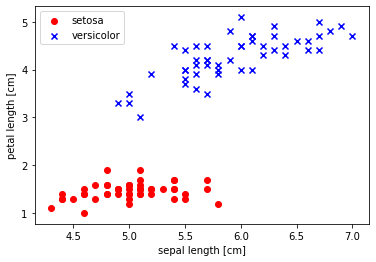

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#setosa 와 versicolor를 선택합니다.
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',-1,1)

# 꽃받침 길이와 꽃잎의 길이를 추출합니다
X = df.iloc[0:100,[0,2]].values

#산점도를 그립니다
plt.scatter(X[:50,0], X[:50,1], color ='red', marker='o', label = 'setosa')
plt.scatter(X[50:,0], X[50:,1], color ='blue', marker='x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

붓꽃 데이터셋에 있는 샘플들은 2처원 부분 강간에서 선형 결정 경게로 구분하기 충분할 것으로 예상 가능 ※ 이렇게 시각화는 많은 정보를 줍니다.


이제 붓꽃 데이터셋에서 추출한 일부 데이터에서 퍼셉트론 알고리즘을 훈련  
에포크 대비 잘못 분류된 오차를 그래프로 그려서, 알고리즘이 수렴하여 두 붓꽃 클래스를 구분하는 결정 경계를 찾는지 확인하겠습니다.

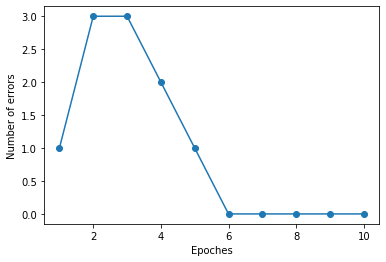

In [24]:
ppn = Perceptron(eta=0.1, n_iter =10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_ ,marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of errors')
plt.show()

여섯 번째 에포크 이후에 수렴했고 훈련 샘플을 완벽하게 분류


간단한 함수를 만들어 2차원 데이터셋의 결정 경계를 시각화 해보겠습니다.

In [33]:
from matplotlib.colors import ListedColormap
def plot_decsision_regions(X,y , classifier, resolution = 0.02):
    # 마커와 컬러맵을 설정합니다.
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 결계를 그립니다.
    x1_min , x1_max = X[:,0].min() -1 , X[:,0].max() +1
    x2_min , x2_max = X[:,1].min() -1 , X[:,1].max() +1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z,alpha =0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 샘플의 산점도를 그립니다.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x= X[y ==cl, 0],
                   y= X[y ==cl ,1],
                   alpha = 0.8,
                   c= colors[idx],
                   marker =markers[idx],
                   label=cl,
                   edgecolor='black')

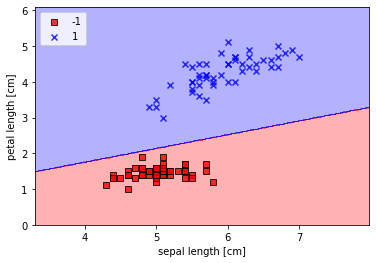

In [34]:
plot_decsision_regions(X,y ,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc ='upper left')
plt.show()